# <font color='Blue'>Linear Regression</font>

## <font color='Blue'>Objectives</font>
   1. Understand the concept of multiple linear regression and its applications in predictive analytics
   2. Build multiple linear regession models using python packages
   3. Apply Regression Diagnostics
   4. Perform model validation tasks and make predictions
   
### <font color='Blue'>References</font>
   1. Machine Learning Using Python,Pradhan Manaranjan and U Dinesh Kumar, Wiley Publications
   2. Applied Multivariate Statistical analysis, Sixth Edition, Richard A Johnson and Dean W Wichern
   3. Multivariate Data Analysis, Seventh Edition, Hair et al., Pearson publication
   4. Internet sources, for pictures, under fair use policy
      https://towardsdatascience.com/linear-regression-explained-1b36f97b7572
      https://www.keboola.com/blog/linear-regression-machine-learning

## <font color='Blue'>Contents</font>   

  ### <font color='Blue'>1. What is Multiple Linear Regression</font>
  ### <font color='Blue'>2. Multiple Linear Regression Application</font>
  ### <font color='Blue'>3. Building a Multiple Linear Regression Model</font>
     STEP 1: Collect, Extract, Analyze Data
             [Predicting the SOLD Price (Auction Price) of Players]
     STEP 2: Processing Data
             [Create Feature Set]
             [Encoding Categorical Features]
     STEP 3: Dividing data into training and validation datasets
     STEP 4: Build the model
     STEP 5: Multi-Collinearity: Measurement and Management
             - Variance Inflation Factor (VIF)
             - Handling attributes with high VIF
     STEP 5: Perform model diagnostics
             Residual Analysis (LINE Principle)
             - Linearity
             - Independence of residuals
             - Normality of residuals
             - Homoscedasticity
     STEP 6: Influencer Analysis
     STEP 7: Measure model accuracy and validate model
     STEP 8: Make Predictions

## <font color='Blue'>1. What is Multiple Linear Regression</font>

  Multiple Linear Regression is a statistical technique for finding the existence of an associaton relationship between a 
  dependent variable (aka response variable or outcome variable) and several independent variables (aka explanatory variable,  
  predictor variable or feature). 

    
### <font color='Blue'>Mathematical Background</font>
 
#### <font color='Blue'>Functional Form of SLR</font>
      Y  = β0 + β1.X1 + β2.X2 + β3.X3 + ... + βn.Xn + ε                                           
      [Response] = [mean value depending on X's] + error               
      Linear refers to the fact that mean is a linear function of unknown parameters β0 and β1.
      ε = Y - β0 - β1.X1 - β2.X2 - β3.X3 - ... - βn.Xn
        
<img src="Regression_Plane.jpg" width="600" height="800">
 
#### <font color='Blue'>Regression Objective</font>
      Let the number of samples be n                    
      Minimize sum of squared residuals                  
      Minimize  ∑(yi - ŷi)^2 over i=1 to i=n    
                where ŷi = β0 + β1.X1i + β2.X2i - β3.X3i                   
                yi is the actual value of y             
                ŷi is the predicted value of y           
      Minimize  ∑(yi - β1.X1i - β2.X2i - β3.X3i - ... - βn.Xni )^2 over i=1 to i=n     
      by finding β0, β1, ..., βn that minimizes the above equation
      
#### <font color='Blue'>Regression Properties</font>
      In eqn form:     Y  = β0 + β1.X1 + β2.X2 + β3.X3 + ... + βn.Xn  + ε
      In matrix form: [Y] = [β][X] + [ε]
                     (nx1)  (nx(r+1) (nx1)
      where n is the number of samples
            r is the number of predictors
      E(ε) = 0
      Var(ε) = constant    
      Relation between Y and X is linear
      Residuals are independent
      
<img src="MLR_Matrix.jpg"  width="500" height="600">
      
####  <font color='Blue'>Regression Properties to be tested (Diagnostics)</font>
1. Linearity        - The relationship between y and x is linear
2. Independence     - The errors are independent of each other (not correlated, especially in a time series)
3. Normality        - The errors (aka residuals) εi follow a normal distribution with mean(ε) = 0
4. Homoscedasticity - The variance var(ε) is constant for different values of X. When var(ε) is constant, it in known as homoscedasticity. When var(ε) is not constant, it is heteroscedasticity   

<img src="Regression_Assumptions.jpg"  width="500" height="600">

## <font color='Blue'>2. Multiple Linear Regression Application</font>

<b> Case Description to be Added <b>

## <font color='Blue'>3. Building a Simple Linear Regression Model</font>
     STEP 1: Collect, Extract, Analyze Data
             [Predicting the SOLD Price (Auction Price) of Players]
     STEP 2: Process Data
             [Create Feature Set]
             [Encoding Categorical Features]
     STEP 3: Dividing data into training and validation datasets
     STEP 4: Build the model
     STEP 5: Multi-Collinearity: Measurement and Management
             - Variance Inflation Factor (VIF)
             - Handling attributes with high VIF
     STEP 5: Perform model diagnostics
             Residual Analysis (LINE Principle)
             - Linearity
             - Independence of residuals
             - Normality of residuals
             - Homoscedasticity
     STEP 6: Influencer Analysis
     STEP 7: Measure model accuracy and validate model
     STEP 8: Make Predictions

### <font color='Green'>Loading Libraries</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

# Setting pandas print option to limit decimal places to 4
np.set_printoptions(precision=4, linewidth=100) 

### <font color='Green'>STEP 1: Collect, Extract, Analyze Data</font>

In [2]:
# Loading Data
data_df = pd.read_excel('IMB529-XLS-ENG.XLSX',sheet_name='MH-Modified Data')

<b> There are 248 observations and 26 features in the data. No missing values </b>

In [3]:
# Displaying 10 columns of few records
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SL.                           248 non-null    int64  
 1   AGE                           248 non-null    float64
 2   GEN                           248 non-null    object 
 3   GENDER                        248 non-null    int64  
 4   MARITAL_STATUS                248 non-null    object 
 5   UNMARRIED                     248 non-null    int64  
 6   KEY COMPLAINTS_CODE           212 non-null    object 
 7   ACHD                          248 non-null    int64  
 8   CAD_DVD                       248 non-null    int64  
 9   CAD_SVD                       248 non-null    int64  
 10  CAD_TVD                       248 non-null    int64  
 11  CAD_VSD                       248 non-null    int64  
 12  OS_ASD                        248 non-null    int64  
 13  other

<b> Notes </b>

    Male(Female)        = 0(1)
    Married(Unmarried)  = 0(1) 
    Alert(unconsious)   = 1(0)
    Elective(Emergency) = 1(0) 
    Implant(no implant) = 1(0)

###  <font color='Green'>STEP 2: Process Data</font>
#### <font color='Green'>STEP 2.1: Detecting and Removing Outliers</font>

In [4]:
print(data_df.shape)

(248, 50)


#### <font color='Green'>Detecting Removing Outliers</font>

In [5]:
data_df['z_score_tc'] = zscore( data_df['TOTAL_COST_TO_HOSPITAL'] )

In [6]:
data_df[ ( data_df.z_score_tc > 3.0) | ( data_df.z_score_tc < -3.0) ]

,SL.,AGE,GEN,GENDER,MARITAL_STATUS,UNMARRIED,KEY COMPLAINTS_CODE,ACHD,CAD_DVD,CAD_SVD,...,TYPE_OF_ADMSN,ELECTIVE,TOTAL_COST_TO_HOSPITAL,TOTAL_LENGTH_OF_STAY,LENGTH_OF_STAY_ICU,LENGTH_OF_STAY_WARD,IMPLANT_USED_(Y/N),IMPLANT,COST_OF_IMPLANT,z_score_tc
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,660293.0,25,12,13,Y,1,38000,3.772841
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,809130.0,41,20,21,Y,1,39690,4.989425
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,629990.0,14,13,1,Y,1,89450,3.525146
6,7,73.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,887350.0,15,15,0,N,0,0,5.628790
12,13,40.0,M,0,MARRIED,0,RHD,0,0,0,...,ELECTIVE,1,711616.0,17,10,7,Y,1,196848,4.192352


#### <font color='Green'>Removing Outliers</font>

In [7]:
data_df = data_df.drop([0, 1,3,6,12])
data_df = data_df.drop(['z_score_tc'],axis=1)
data_df.shape 

(243, 50)

#### <font color='Green'>STEP 2.2: Create Feature Set</font>

#### <font color='Green'>Cleaning Data</font>

In [8]:
# Identifying Columns
print(data_df.columns)
print("")

# Remove attributes that cannot be predictors - 'Sl.'
data_df = data_df.drop(['SL.','TOTAL_LENGTH_OF_STAY'],axis=1)
# data_df = sm.add_constant( data_df, prepend=True ) 
print(data_df.columns)

Index(['SL.', 'AGE', 'GEN', 'GENDER', 'MARITAL_STATUS', 'UNMARRIED',
       'KEY COMPLAINTS_CODE', 'ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
       'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
       'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
       'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
       'PAST_MEDICAL_HISTORY_CODE', 'Diabetes1', 'Diabetes2', 'hypertension1',
       'hypertension2', 'hypertension3', 'other', 'HB', 'UREA', 'CREATININE',
       'MODE_OF_ARRIVAL', 'AMBULANCE', 'TRANSFERRED',
       'STATE_AT_THE_TIME_OF_ARRIVAL', 'ALERT', 'TYPE_OF_ADMSN', 'ELECTIVE',
       'TOTAL_COST_TO_HOSPITAL', 'TOTAL_LENGTH_OF_STAY', 'LENGTH_OF_STAY_ICU',
       'LENGTH_OF_STAY_WARD', 'IMPLANT_USED_(Y/N)', 'IMPLANT',
       'COST_OF_IMPLANT'],
      dtype='object')

Index(['AGE', 'GEN', 'GENDER', 'MARITAL_STATUS', 'UNMARRIED',
       'KEY COMPLAINTS_CODE', 'ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
       'CAD_VSD', 'OS_ASD', 'o

#### <font color='Green'>Removing Rows with Missing Values</font>

In [9]:
features =    ['AGE', 'GENDER', 'UNMARRIED', 'ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
              'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
              'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
              'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
              'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
              'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
              'TRANSFERRED', 'ALERT', 'ELECTIVE',  
              'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT', 'COST_OF_IMPLANT','TOTAL_COST_TO_HOSPITAL']
data_df_cleaned = data_df[features]
data_df_cleaned.shape

(243, 40)

In [10]:
data_df_cleaned = data_df_cleaned.dropna()
data_df_cleaned.shape

(186, 40)

In [11]:
# Creating Feature Set
 
X_features = ['AGE', 'GENDER', 'UNMARRIED', 'ACHD', 'CAD_DVD', 'CAD_SVD', 'CAD_TVD',
              'CAD_VSD', 'OS_ASD', 'other_heart', 'other_respiratory',
              'other_general', 'other_nervous', 'other_tertalogy', 'PM_VSD', 'RHD',
              'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
              'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2',
              'hypertension3', 'other', 'HB', 'UREA', 'CREATININE', 'AMBULANCE',
              'TRANSFERRED', 'ALERT', 'ELECTIVE',  
              'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'IMPLANT', 'COST_OF_IMPLANT']

X = data_df_cleaned[X_features]

Y = data_df_cleaned['TOTAL_COST_TO_HOSPITAL']

In [12]:
X = sm.add_constant(X,has_constant='add') 
X.shape

(186, 40)

### <font color='Green'>STEP 3: Dividing data into training and validation datasets</font>

In [13]:
# Splitting Data into Train and Validation Sets
# Add constant - 1 to X, it will ensure that β0 is calculated

train_X, test_X, train_y, test_y = train_test_split( X , Y, train_size = 0.7, random_state = 42 )

print("Rows Train X:", len(train_X.index), "Columns Train X:", len(train_X.columns))
print("Rows Test X:", len(test_X.index), "Columns Test X:", len(test_X.columns))
print("Length Train y:", len(train_y))
print("Length Test y:", len(test_y))

Rows Train X: 130 Columns Train X: 40
Rows Test X: 56 Columns Test X: 40
Length Train y: 130
Length Test y: 56


### <font color='Green'>STEP 4: Build the model</font>

In [14]:
# Building the model using training dataset
# Model Building process will take several iterations
model_1 = sm.OLS(train_y, train_X).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                 OLS                       Adj. R-squared:        0.868     
Dependent Variable:    TOTAL_COST_TO_HOSPITAL    AIC:                   3128.9430 
Date:                  2021-07-21 12:06          BIC:                   3237.9093 
No. Observations:      130                       Log-Likelihood:        -1526.5   
Df Model:              37                        F-statistic:           23.97     
Df Residuals:          92                        Prob (F-statistic):    2.06e-33  
R-squared:             0.906                     Scale:                 1.3084e+09
----------------------------------------------------------------------------------
                       Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
----------------------------------------------------------------------------------
const                  289.8653 35304.6394  0.0082 0.9935  -69828.1959  70407.9266
AGE                   -108.0572   354.4250 -0.3049 0.7611    -811.9758    595.8614
GENDER                1272.7156  8222.2781  0.1548 0.8773  -15057.4383  17602.8696
UNMARRIED            -6304.3083 16888.8288 -0.3733 0.7098  -39846.9801  27238.3635
ACHD                  6735.4411 16674.6526  0.4039 0.6872  -26381.8584  39852.7406
CAD_DVD              25590.8505 15837.9770  1.6158 0.1096   -5864.7388  57046.4399
CAD_SVD              30924.7896 32084.4466  0.9639 0.3376  -32797.6908  94647.2700
CAD_TVD              22097.1764 16582.9768  1.3325 0.1860  -10838.0469  55032.3998
CAD_VSD                 -0.0000     0.0000 -0.5573 0.5787      -0.0000      0.0000
OS_ASD                  50.7876 17614.6675  0.0029 0.9977  -34933.4625  35035.0376
other_heart            349.0227 14313.0809  0.0244 0.9806  -28077.9914  28776.0367
other_respiratory    10231.2297 24819.8256  0.4122 0.6811  -39063.0862  59525.5456
other_general       -50052.8107 49736.4624 -1.0064 0.3169 -148833.7182  48728.0968
other_nervous        13284.9897 39701.5014  0.3346 0.7387  -65565.6189  92135.5984
other_tertalogy      29660.5745 20361.8148  1.4567 0.1486  -10779.7472  70100.8963
PM_VSD               42817.6599 30563.0477  1.4010 0.1646  -17883.1910 103518.5108
RHD                 -26958.8736 18833.9711 -1.4314 0.1557  -64364.7660  10447.0188
BODY_WEIGHT           -127.4191   475.3672 -0.2680 0.7893   -1071.5393    816.7011
BODY_HEIGHT            290.4006   193.1361  1.5036 0.1361     -93.1845    673.9856
HR_PULSE               219.6600   225.6980  0.9732 0.3330    -228.5958    667.9157
BP_HIGH                136.4618   272.2737  0.5012 0.6174    -404.2972    677.2208
BP_LOW                   4.5437   355.9393  0.0128 0.9898    -702.3825    711.4700
RR                   -1299.6419  1247.2360 -1.0420 0.3001   -3776.7602   1177.4764
Diabetes1            17784.3707 22502.4793  0.7903 0.4314  -26907.4956  62476.2369
Diabetes2            28852.9872 21171.2771  1.3628 0.1763  -13194.9965  70900.9708
hypertension1       -10591.4723 14051.4803 -0.7538 0.4529  -38498.9250  17315.9805
hypertension2       -15410.4311 15530.7617 -0.9923 0.3237  -46255.8644  15435.0022
hypertension3         3591.2754 28679.2226  0.1252 0.9006  -53368.1362  60550.6871
other                -4733.6830 13580.8729 -0.3486 0.7282  -31706.4689  22239.1028
HB                     -60.8138  1418.9723 -0.0429 0.9659   -2879.0153   2757.3876
UREA                  -500.2961   362.6162 -1.3797 0.1710   -1220.4833    219.8910
CREATININE           21007.9077 14096.3538  1.4903 0.1396   -6988.6676  49004.4830
AMBULANCE             4189.9300 43488.7463  0.0963 0.9235  -82182.4741  90562.3340
TRANSFERRED         -15187.3410 22031.1832 -0.6894 0.4923  -58943.1724  28568.4904
ALERT                  289.8653 35304.6394  0.0082 0.9935  -69828.1959  70407.9266
ELECTIVE              4276.6573 42688.4401  0.1002 0.9204  -80506.2695  8905

#### <font color='Green'>Extracting Significant Features</font>
Look for pvalues < 0.05 in model object

In [15]:
significant_vars = model_1.pvalues.where(model_1.pvalues < 0.05).dropna()
significant_vars 

LENGTH_OF_STAY_ICU     4.088413e-28
LENGTH_OF_STAY_WARD    3.953510e-09
COST_OF_IMPLANT        4.395835e-04
dtype: float64

#### <font color='Green'>STEP 5: Multi-Collinearity: Measurement and Management</font>

#### <font color='Green'>Multi-Collinearity</font>

When a dataset has a large number of independent variables (features), it is possible that few of these independent variables
  are highly correlated. The existence of high correlation between independent variables is called multicollinearity. 
  Multicollinearity may destabilize the model and have the following impacts.
  1. The standard error (SD) of β is inflated
  2. A statististically significant variable may be rendered insignificanct as its std error is inflated.
  3. The sign of regression coefficient may be different
  4. Adding / Removing regression coefficient may cause a large change in regression coefficient
  
#### <font color='Green'>Measurement using Variance Inflation Factor (VIF)</font>

  VIF measures the variance in a variable that can be explained by other variables.
  
  VIF = X, means (1 - 1/X) % of variance in the variable can be explained by other variables
  VIF = 1, means (1 - 1/1 = 0%)  of variance in the variable can be explained by other variables. 
  VIF = 1  means that the variable is not correlated with other variables
  VIF = 2, means (1 - 1/2 = 50%) of variance in the variable can be explained by other variables
  VIF = 3, means (1 - 1/3 = 67%) of variance in the variable can be explained by other variables
  VIF = 4, means (1 - 1/2 = 75%) of variance in the variable can be explained by other variables
  VIF = 5, means (1 - 1/5 = 80%) of variance in the variable can be explained by other variables
  and so on.
  
  So higher VIF indicates heavy multicollinearity.
  
#### <font color='Green'>Multicollinearity Management</font>
  1. Identify Variables with VIF > 4 [authors differ in opinion, but usually not higher than 10 is permitted]
  2. Check correlations of variables with VIF > 4
  3. Among a group of variables with VIF > 4, retain only one.
  4. Reconstruct the model

#### <font color='Green'>Determining VIF</font>

In [16]:
def get_vif_factors( X ):
    X_matrix = np.asmatrix(X)
    vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['vif'] = vif
    return vif_factors

In [17]:
features_vif = ['AGE', 'BODY_WEIGHT', 'BODY_HEIGHT', 'HR_PULSE', 'BP_HIGH', 'BP_LOW', 'RR',
                'HB', 'UREA', 'CREATININE', 'LENGTH_OF_STAY_ICU', 'LENGTH_OF_STAY_WARD', 'COST_OF_IMPLANT']
vif_factors = get_vif_factors( X[features_vif] )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,column,vif
4,BP_HIGH,85.993764
5,BP_LOW,60.915638
2,BODY_HEIGHT,47.620398
6,RR,38.990157
1,BODY_WEIGHT,29.310957
3,HR_PULSE,27.967867
7,HB,22.275631
9,CREATININE,11.543841
0,AGE,11.214474
11,LENGTH_OF_STAY_WARD,7.153806


#### <font color='Green'>Extracting attributes with VIF > 10</font>

In [18]:
columns_with_large_vif = vif_factors[vif_factors.vif > 10].column
print(columns_with_large_vif)

4        BP_HIGH
5         BP_LOW
2    BODY_HEIGHT
6             RR
1    BODY_WEIGHT
3       HR_PULSE
7             HB
9     CREATININE
0            AGE
Name: column, dtype: object


#### <font color='Green'>Plotting correlation map of attributes with VIF > 10</font>

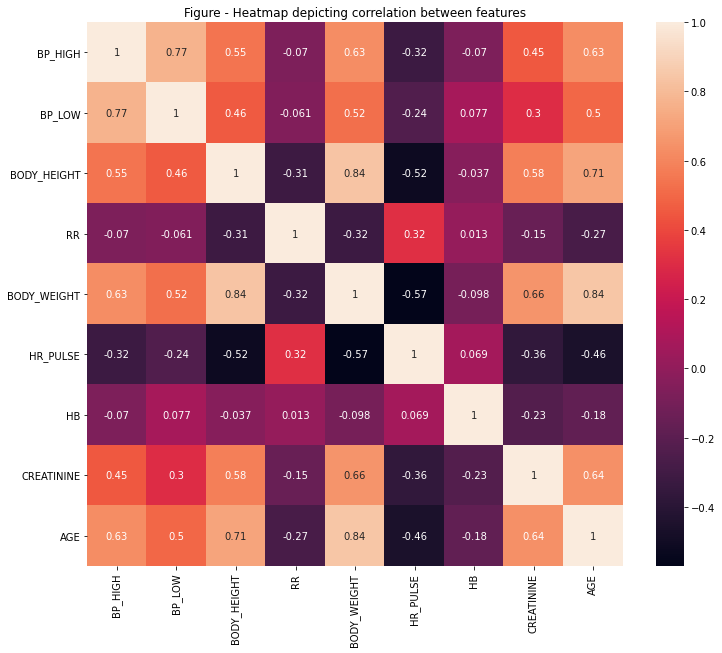

In [19]:
plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title( "Figure - Heatmap depicting correlation between features");

#### <font color='Green'>Iterative process for removing Variables with VIF > 10</font>

Start with variables [BP_HIGH] in descending order and keep removing attributes one by one. <br>
Keep repeating the process unless there is no variable with VIF > 10.<br>
After several iterations - found that has to be removed ['BP_HIGH','BODY_HEIGHT','RR','BP_LOW','BODY_WEIGHT','HR_PULSE'] <br>
The remaining variables captured in X_N for regression

#### <font color='Green'>Began Process with Columns</font>


In [20]:
#columns_to_be_removed = ['BP_HIGH','BP_LOW','BODY_HEIGHT','RR','BODY_WEIGHT','HR_PULSE','HB','CREATININE','AGE']

#### <font color='Green'>Ended Process with Columns</font>


In [21]:
columns_to_be_removed = ['BP_HIGH','BODY_HEIGHT','RR','BP_LOW','BODY_WEIGHT','HR_PULSE']

In [22]:
new_features_vif = list( set(features_vif) - set(columns_to_be_removed) )
vif_factors = get_vif_factors( X[new_features_vif] )
vif_factors = vif_factors.sort_values('vif',ascending=False)
vif_factors

,column,vif
2,CREATININE,8.678469
6,HB,6.921289
4,LENGTH_OF_STAY_WARD,5.976150
3,UREA,5.759588
5,AGE,5.023875
0,LENGTH_OF_STAY_ICU,2.627927
1,COST_OF_IMPLANT,1.255000


<b> We shall use "new_features_vif" attributes along with categorical variables for re-building regression model. </b>

In [23]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) )
print(X_new_features)

['other_nervous', 'Diabetes1', 'RHD', 'other_general', 'AGE', 'UNMARRIED', 'ACHD', 'IMPLANT', 'hypertension2', 'CREATININE', 'UREA', 'CAD_SVD', 'Diabetes2', 'hypertension1', 'TRANSFERRED', 'ELECTIVE', 'ALERT', 'hypertension3', 'other_respiratory', 'OS_ASD', 'LENGTH_OF_STAY_ICU', 'AMBULANCE', 'COST_OF_IMPLANT', 'LENGTH_OF_STAY_WARD', 'other_heart', 'other_tertalogy', 'other', 'HB', 'CAD_TVD', 'CAD_DVD', 'PM_VSD', 'CAD_VSD', 'GENDER']


#### <font color='Green'>Regenerate Train and Test</font>

In [24]:
#Re-add 'const' to X_new_features
X_new_features.insert(0, 'const')
train_X = train_X[X_new_features]
test_X  = test_X[X_new_features]

print("Rows Train X:", len(train_X.index), "Columns Train X:", len(train_X.columns))
print("Rows Test X:", len(test_X.index), "Columns Test X:", len(test_X.columns))
print("Length Train y:", len(train_y))
print("Length Test y:", len(test_y))

Rows Train X: 130 Columns Train X: 34
Rows Test X: 56 Columns Test X: 34
Length Train y: 130
Length Test y: 56


#### <font color='Green'>Regenerate Model</font>

In [25]:
# Building the model using training dataset
# Model Building process will take several iterations
model_2 = sm.OLS(train_y, train_X).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                  OLS                      Adj. R-squared:       0.869     
Dependent Variable:     TOTAL_COST_TO_HOSPITAL   AIC:                  3123.9895 
Date:                   2021-07-21 12:06         BIC:                  3215.7506 
No. Observations:       130                      Log-Likelihood:       -1530.0   
Df Model:               31                       F-statistic:          28.69     
Df Residuals:           98                       Prob (F-statistic):   1.21e-36  
R-squared:              0.901                    Scale:                1.2967e+09
---------------------------------------------------------------------------------
                       Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------------
const                 9561.7770 25996.8664  0.3678 0.7138  -42028.1583 61151.7122
other_nervous         7324.5961 39025.2919  0.1877 0.8515  -70119.8255 84769.0178
Diabetes1            17662.2384 21914.8314  0.8059 0.4222  -25827.0313 61151.5082
RHD                 -21858.4061 18410.6214 -1.1873 0.2380  -58393.6851 14676.8730
other_general       -52987.6795 48728.3860 -1.0874 0.2795 -149687.5756 43712.2166
AGE                    180.9266   317.7999  0.5693 0.5704    -449.7370   811.5903
UNMARRIED            -4226.2255 15711.9458 -0.2690 0.7885  -35406.0706 26953.6197
ACHD                  6688.8487 16250.6012  0.4116 0.6815  -25559.9405 38937.6378
IMPLANT              13781.8267 22816.3399  0.6040 0.5472  -31496.4572 59060.1105
hypertension2       -17107.5243 15032.7191 -1.1380 0.2579  -46939.4662 12724.4176
CREATININE           26043.0402 13343.6159  1.9517 0.0538    -436.9312 52523.0116
UREA                  -507.9012   355.2135 -1.4298 0.1559   -1212.8109   197.0084
CAD_SVD              31628.6590 31227.3569  1.0129 0.3136  -30341.0144 93598.3324
Diabetes2            32482.9471 20559.0150  1.5800 0.1173   -8315.7491 73281.6432
hypertension1       -18139.7009 13375.3636 -1.3562 0.1782  -44682.6747  8403.2728
TRANSFERRED         -17586.5686 21754.0956 -0.8084 0.4208  -60756.8633 25583.7261
ELECTIVE              9902.7340 40474.1392  0.2447 0.8072  -70416.8780 90222.3459
ALERT                 9561.7770 25996.8664  0.3678 0.7138  -42028.1583 61151.7122
hypertension3        10497.2979 27604.5701  0.3803 0.7046  -44283.0731 65277.6689
other_respiratory     6369.3514 24463.5168  0.2604 0.7951  -42177.7014 54916.4043
OS_ASD                4910.1455 17012.6797  0.2886 0.7735  -28850.9637 38671.2548
LENGTH_OF_STAY_ICU   20120.0287  1220.2366 16.4886 0.0000   17698.5088 22541.5485
AMBULANCE             6442.0557 41179.5222  0.1564 0.8760  -75277.3658 88161.4772
COST_OF_IMPLANT          2.1963     0.5722  3.8381 0.0002       1.0607     3.3319
LENGTH_OF_STAY_WARD   6931.1306  1066.2043  6.5008 0.0000    4815.2829  9046.9783
other_heart          -3366.7447 13401.6212 -0.2512 0.8022  -29961.8258 23228.3364
other_tertalogy      33327.4830 19373.9491  1.7202 0.0885   -5119.4885 71774.4544
other                -9419.1127 13177.0636 -0.7148 0.4764  -35568.5666 16730.3412
HB                     454.3024  1341.8099  0.3386 0.7357   -2208.4756  3117.0805
CAD_TVD              21571.9740 15797.7862  1.3655 0.1752   -9778.2186 52922.1666
CAD_DVD              27402.3829 15012.1059  1.8254 0.0710   -2388.6528 57193.4185
PM_VSD               36778.0930 28435.0691  1.2934 0.1989  -19650.3761 93206.5621
CAD_VSD                  0.0000     0.0000     nan    nan       0.0000     0.0000
GENDER                 131.9325  8023.9268  0.0164 0.9869  -15791.2892 16055.1542
---------------------------------------------------------------------------------
Omnibus:                9.157         Durbin-Watson:            1.917            
Prob(Omnibus):          0.010         Ja

#### <font color='Green'>Extracting Significant Features</font>
Look for pvalues < 0.05 in model object

In [26]:
significant_vars = model_2.pvalues.where(model_2.pvalues < 0.05).dropna()
significant_vars = significant_vars.index.tolist()
significant_vars

['LENGTH_OF_STAY_ICU', 'COST_OF_IMPLANT', 'LENGTH_OF_STAY_WARD']

In [27]:
significant_vars = ['const', 'LENGTH_OF_STAY_ICU', 'COST_OF_IMPLANT', 'LENGTH_OF_STAY_WARD']
train_X = train_X[significant_vars]
test_X  = test_X[significant_vars]

print("Rows Train X:", len(train_X.index), "Columns Train X:", len(train_X.columns))
print("Rows Test X:", len(test_X.index), "Columns Test X:", len(test_X.columns))
print("Length Train y:", len(train_y))
print("Length Test y:", len(test_y))

Rows Train X: 130 Columns Train X: 4
Rows Test X: 56 Columns Test X: 4
Length Train y: 130
Length Test y: 56


#### <font color='Green'>Regenerate Model</font>

In [28]:
model_3 = sm.OLS(train_y, train_X).fit()
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                OLS                     Adj. R-squared:      0.837     
Dependent Variable:   TOTAL_COST_TO_HOSPITAL  AIC:                 3129.5121 
Date:                 2021-07-21 12:06        BIC:                 3140.9822 
No. Observations:     130                     Log-Likelihood:      -1560.8   
Df Model:             3                       F-statistic:         221.7     
Df Residuals:         126                     Prob (F-statistic):  4.54e-50  
R-squared:            0.841                   Scale:               1.6189e+09
-----------------------------------------------------------------------------
                      Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------------
const               38256.9839 9794.9353  3.9058 0.0002 18873.0949 57640.8728
LENGTH_OF_STAY_ICU  23373.2228 1073.0257 21.7825 0.0000 21249.7364 25496.7092
COST_OF_IMPLANT         2.1696    0.2219  9.7791 0.0000     1.7306     2.6087
LENGTH_OF_STAY_WARD  7244.8670 1070.3281  6.7688 0.0000  5126.7191  9363.0149
-----------------------------------------------------------------------------
Omnibus:                  10.320           Durbin-Watson:              1.903 
Prob(Omnibus):            0.006            Jarque-Bera (JB):           25.497
Skew:                     -0.004           Prob(JB):                   0.000 
Kurtosis:                 5.170            Condition No.:              49135 
=============================================================================
* The condition number is large (5e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

### <font color='Green'>STEP 5: Model Diagnostics </font>

#### <font color='Green'>5.1: Perform Model Diagnostics: Linearity of Relationship</font>

We can check this by plotting scatterplot of X and Y. Scatterplot shows that SOLD PRICE is linearly related with SIXERS and ODI-WKTS

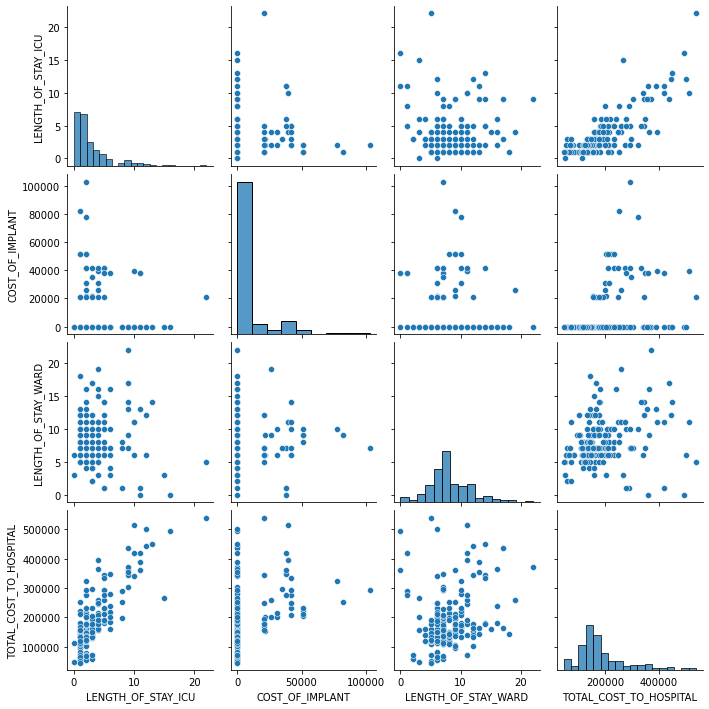

In [29]:
columns = ['LENGTH_OF_STAY_ICU', 'COST_OF_IMPLANT', 'LENGTH_OF_STAY_WARD','TOTAL_COST_TO_HOSPITAL']
df = data_df_cleaned[columns]
sn.pairplot(df)  
plt.show()

#### <font color='Green'>5.2: Perform Model Diagnostics: Independence of Residuals</font>

How do we check this?
    This is hard to check. If the data is naturally chronological, then the plot of residuals over time may be observed for any specific pattern. Usually, in time-series data, Durbin-Watson Test may be used for assess the independence of time-series data. <br>
    
<b> Durbin Watson Test: </b> <br>
The Durbin Watson Test is a measure of autocorrelation (also called serial correlation) in residuals from regression analysis. Autocorrelation is the similarity of a time series over successive time intervals. The Durbin Watson test reports a test statistic, with a value from 0 to 4, where: <br>

    (A). 2 is no autocorrelation <br>
    (B). 0 to <2 is positive autocorrelation (common in time series data) <br>
    (C). >2 to 4 is negative autocorrelation (less common in time series data) <br>
    Usually value of 1.5 to 2.5 is considered acceptable. <br>
    
In our case, the data is not time series, so we assume independence of residuals. Further, the Durbin Watson test statistic is in acceptable range.

#### <font color='Green'>5.3: Perform Model Diagnostics: Normality of Residuals</font>

In [30]:
# Standardization function
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

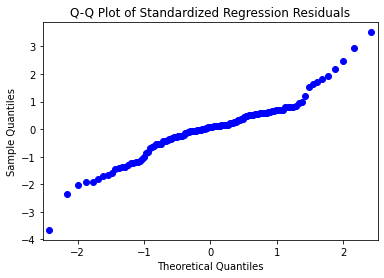

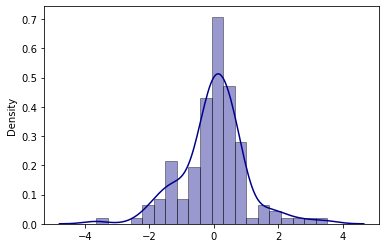

In [31]:
# Gathering residuals and standardizing them
resid = model_3.resid
resid_std =get_standardized_values(resid)

# QQ plot
sm.qqplot(resid_std) 
plt.title( "Q-Q Plot of Standardized Regression Residuals" );
plt.show()

# Density Plot
sn.distplot(resid_std, color = 'darkblue',hist_kws={'edgecolor':'black'});

<b> Both QQ Plot and Distribution Plot show that residuals are approximately normally distributed </b> <br>
<b> We are working with a small sample size </b>

#### <font color='Green'>STEP 5.4: Perform Model Diagnostics: Homoscedasticity of residuals  </font>

The homoscedasticity can be observed by a drawing a residual plot, which is a plot between standardised residual value and standardized predicted value. The plot must be random and any pattern (especially fan-shape) indicates heteroscedasticity

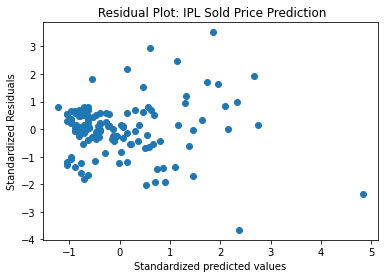

In [32]:
fittedvalues_std = get_standardized_values( model_3.fittedvalues )
plt.scatter( fittedvalues_std, resid_std)
plt.title( " Residual Plot: IPL Sold Price Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

Plot shows that residuals are random and doesnot show any pattern. So residuals are homoscedastic

Incases, where normality and homoscedasticity does not hold, it means that we are unable to build a model that can predict well. We may look at variable transformations. May also, look at respecification of model, by including predictors. Weighted-least squares can help overcome heteroscedasticity.

### <font color='Green'>STEP 6.0: Influencer Analysis  </font>

#### <font color='Green'>STEP 6.1: Leverage Values  </font>

In [33]:
# Detecting Influencers

k = train_X.shape[1]
n = train_X.shape[0]
print( "Number of variables:", k, " and number of observations:", n)

# Threshold for influence = 3*((k + 1)/n)
leverage_cutoff = 3*((k + 1)/n)
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) )

Number of variables: 4  and number of observations: 130
Cutoff for leverage value:  0.115


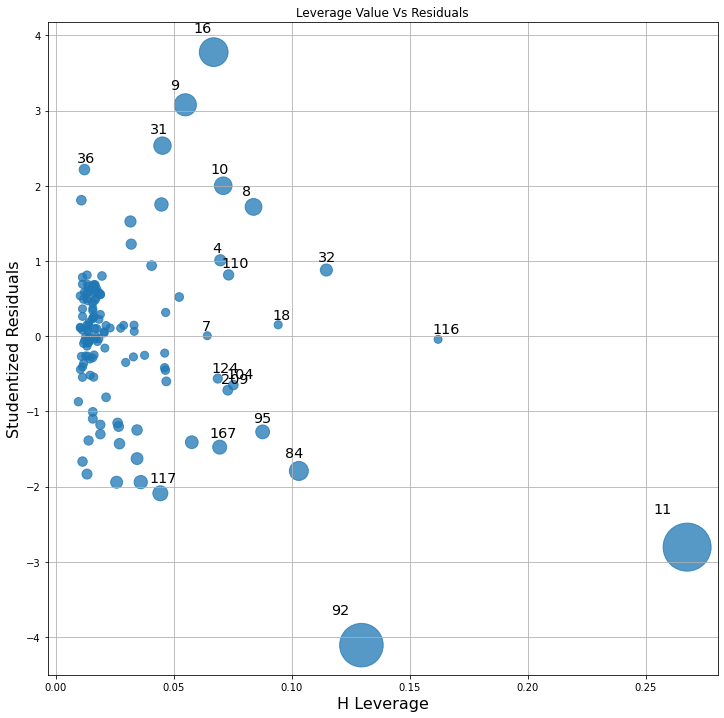

In [34]:
# Influence plot

from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(12, 12))
fig = influence_plot(model_3, ax=ax)
plt.title( "Leverage Value Vs Residuals")
plt.grid()

<b> We can remove observations #92, #116 and #11 and rerrun the model </b>

#### <font color='Green'>STEP 6.2: Cook's Distance  </font>

Cook's distance measures how much the predicted value of the dependent variable changes for all the observations in the sample when a particular observation is excluded from the sample for the estimation of regression parameters. A Cook's distance value of > 1 indicates highly influential observation.

No influential variables as per Cooks Distance

values and indices [] (array([], dtype=int64),)


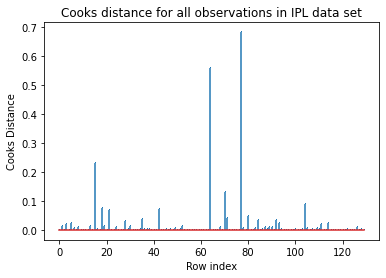

In [35]:
model_influence = model_3.get_influence()
(c, p) = model_influence.cooks_distance
plt.stem( np.arange( len( train_X) ), np.round( c, 3 ), markerfmt="," );
plt.title( "Cooks distance for all observations in IPL data set" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");
print("values and indices",c[c>1.0],np.nonzero(c>1.0))

### <font color='Green'>STEP 7.0: Measure model accuracy and validate model  </font>

In [36]:
pred_y = model_3.predict( test_X[train_X.columns] )

rsquare_train = round(r2_score(train_y, model_3.fittedvalues),4)
rsquare_valid = round(r2_score(test_y, pred_y),4)

rmse_train = round(np.sqrt(mean_squared_error(train_y,model_3.fittedvalues)),4)
rmse_valid = round(np.sqrt(mean_squared_error(test_y,pred_y)),4)

print("R-Square_Train: ", rsquare_train, " RMSE_Train: ", rmse_train)
print("R-Square_Valid: ", rsquare_valid, " RMSE_Valid: ", rmse_valid)

R-Square_Train:  0.8407  RMSE_Train:  39611.5944
R-Square_Valid:  0.8642  RMSE_Valid:  32577.5161


### <font color='Green'>STEP 8.0: Making Predictions  </font>

In [37]:
# Calculating Prediction Intervals

predictions = model_3.get_prediction(test_X[train_X.columns])
predictions_df = round(predictions.summary_frame(alpha=0.05),2)
predictions_df

# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'test_y': test_y,
                            'pred_y': predictions_df['mean'],
                            'pred_y_left': predictions_df['obs_ci_lower'],
                            'pred_y_right': predictions_df['obs_ci_upper'],
                            'pred_interval_size':predictions_df['obs_ci_upper']-predictions_df['obs_ci_lower']} )
pred_y_df

,test_y,pred_y,pred_y_left,pred_y_right,pred_interval_size
153,140545.00,141323.74,60872.76,221774.73,160901.97
220,205998.00,159090.72,79063.49,239117.95,160054.46
227,212287.00,198592.30,118397.99,278786.61,160388.62
139,84002.50,105099.41,24854.30,185344.52,160490.22
138,97060.80,126834.01,46632.96,207035.06,160402.10
20,341109.00,315458.41,234071.35,396845.48,162774.13
239,124860.00,121227.76,40948.54,201506.99,160558.45
46,133130.00,128472.63,48324.57,208620.70,160296.13
160,155352.00,196850.22,116581.24,277119.21,160537.97
201,109117.00,119589.14,39429.35,199748.93,160319.58
